In [1]:
# Importing Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Load training and test data
training_data = pd.read_csv('train.csv')
testing_data = pd.read_csv('test.csv')

# Preprocess the data
test_data = testing_data.drop("SalePrice", axis=1)
mean_values = training_data.mean()
std_dev = training_data.std()
normalized_train_data = (training_data - mean_values) / std_dev
normalized_test_data = (test_data - mean_values.drop("SalePrice")) / std_dev.drop("SalePrice")

In [9]:
# Initialisation and Gradient Descent Function

# Initialize variables and parameters
gradient_m = np.zeros(len(normalized_train_data.columns)-1)  # Gradient for m
gradient_b = 0  # Gradient for b
learning_rate = 0.0001  # Learning rate
mean_squared_error = 0
num_iterations = 1100
mean_squared_error_list = [0 for _ in range(num_iterations)]

# Define the gradient descent function
def perform_gradient_descent(current_m, current_b, data_points, learning_rate):
    m_gradient = np.zeros(len(current_m))
    b_gradient = 0
    mean_squared_error = 0
    total_points = len(data_points)

    for i in range(total_points):
        x = data_points.iloc[i][: -1].values
        y = data_points.iloc[i].SalePrice
        predicted_y = np.dot(current_m, x) + current_b
        mean_squared_error += (predicted_y - y) ** 2
        corrected_mean_squared_error = (mean_squared_error * std_dev.SalePrice + mean_values.SalePrice)
        m_gradient += -(2/total_points) * x * (y - (current_m * x + current_b))
        b_gradient += -(2/total_points) * (y - (current_m * x + current_b))

    new_m = current_m - m_gradient * learning_rate
    new_b = current_b - b_gradient * learning_rate
    corrected_mean_squared_error /= total_points/(10)
    corrected_mean_squared_error_series = pd.Series(corrected_mean_squared_error)
    return new_m, new_b, corrected_mean_squared_error_series[0]

    m = m_now - m_gradient * L
    b = b_now - b_gradient * L
    cmse /= n/(10)
    temp=pd.Series(cmse)
    return m, b, temp[0]

# Run the gradient descent function for a number of iterations (epochs)
for i in range(num_iterations):
    if i % 50 == 0:
        print(f"Iteration: {i}")
        print(f"Mean Squared Error: {mean_squared_error}")
    gradient_m, gradient_b, mean_squared_error = perform_gradient_descent(gradient_m, gradient_b, normalized_train_data, learning_rate)
    mean_squared_error_list[i] = mean_squared_error

Iteration: 0
Mean Squared Error: 0
Iteration: 50
Mean Squared Error: 742045.3384177202
Iteration: 100
Mean Squared Error: 686855.2217099586
Iteration: 150
Mean Squared Error: 635247.5545266374
Iteration: 200
Mean Squared Error: 587126.6911842774
Iteration: 250
Mean Squared Error: 542399.1246887795
Iteration: 300
Mean Squared Error: 500973.4419704026
Iteration: 350
Mean Squared Error: 462760.280028817
Iteration: 400
Mean Squared Error: 427672.2829699921
Iteration: 450
Mean Squared Error: 395624.05991702754
Iteration: 500
Mean Squared Error: 366532.14377741166
Iteration: 550
Mean Squared Error: 340314.9508494992
Iteration: 600
Mean Squared Error: 316892.74125140795
Iteration: 650
Mean Squared Error: 296187.5801557913
Iteration: 700
Mean Squared Error: 278123.2998143446
Iteration: 750
Mean Squared Error: 262625.4623561772
Iteration: 800
Mean Squared Error: 249621.32334452684
Iteration: 850
Mean Squared Error: 239039.79607656706
Iteration: 900
Mean Squared Error: 230811.41661142174
Iterati

In [10]:
# Print the final values of m and b gradients
print(f"Final m-gradient (theta): {gradient_m}")
print(f"Final b-gradient: {gradient_b}")

Final m-gradient (theta): [0.15537683 0.13970329 0.12702818 0.12694336 0.12008748 0.11910768
 0.11060037 0.10468744 0.10377671 0.09823225]
Final b-gradient: [ 2.64921904e-17  2.98876490e-17  2.95595701e-17  3.14443621e-17
  2.84972007e-17  3.34080833e-17  2.94384224e-17  3.05623333e-17
  1.78385715e-17 -2.45841474e-17]


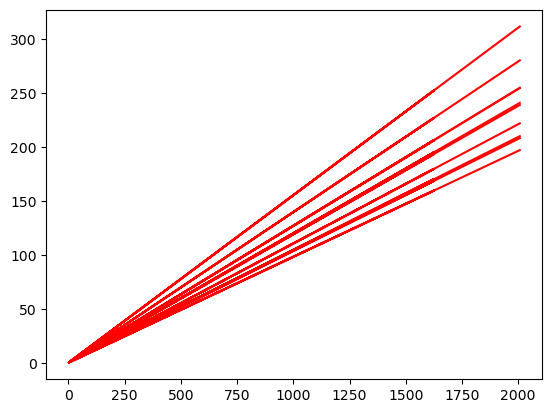

In [17]:
# Plot the linear regression function for multiple parameters
plt.plot(training_data.iloc[i][: -1].values, [np.dot(gradient_m, x) + gradient_b for x in training_data.iloc[i][: -1].values], color="red")
plt.show()


In [12]:
# Make predictions
predictions = [np.dot(gradient_m, x) + gradient_b for x in testing_data.drop("SalePrice", axis=1).values]
testing_data['Predictions'] = predictions

# Print some of the predictions
for i in range(len(predictions)-1):
    if i % 20 == 0:
        print(predictions[i][0])

1042.412136964631
943.8097804098891
833.9024597305107
865.0011958934667
1036.6328934662938
1138.383089639195
839.3667090008433
881.4656380438889
925.014821469352
841.9983547721951
956.054982384776
1207.4626886761105
925.8591612712795
794.6325237765943
783.9881003843014


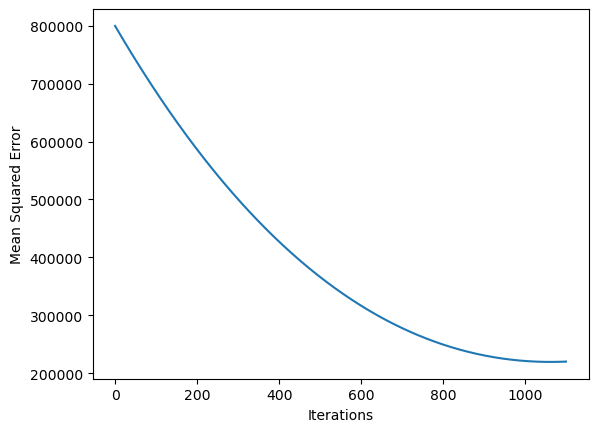


Final Mean Squared Error: 220094.9956234457


In [13]:
# Plot the variation of Mean Squared Error (MSE) over multiple iterations (epochs)
plt.plot(range(num_iterations), mean_squared_error_list)
plt.xlabel("Iterations")
plt.ylabel("Mean Squared Error")
plt.show()
print(f"\nFinal Mean Squared Error: {mean_squared_error}")